In [2]:
import pandas as pd
import InputVariables, Premium
import csv
import RunConfig
import Projection
import PortfolioProjection
import Reserve
import SimpleTerm
import matplotlib.pyplot as plt

In [3]:
Portfolio = []
with open('MP.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        Portfolio.append(InputVariables.Policy(product = row[0],
                                             age_at_entry = int(row[1]),
                                             sex = int(row[2]),   # 1 male , 0 female
                                             entry_year = int(row[3]),
                                             entry_month = int(row[4]),
                                             pol_term_y = int(row[5]),
                                             annual_prem = float(row[6]),
                                             prem_paybl = int(row[7]),
                                             prem_freq = int(row[8]),
                                             sum_assured = float(row[9]),
                                             pols_if = float(row[10]), 
                                             init_comm = float(row[11]), 
                                             ren_comm = float(row[12]) ))


In [4]:
Portfolio[0].ren_comm

0.05

In [5]:
Global = RunConfig.Global(mortality_tb = 'MortTb1.csv')
RunConfig =  RunConfig.RunConfig(proj_start_yr = 2019, proj_start_mth = 1, proj_term = 36)

print("Mortality_tb [24][1] = ", Global.mortality_tb[24][1])

MortTb1.csv
Mortality_tb [24][1] =  0.00026


In [6]:
Inputs = InputVariables.Inputs(policy_tb = Portfolio, Global = Global)

In [7]:
ProjectionPP = Projection.ProjectionPP(Policy = Portfolio[0], RunConfig = RunConfig, Global = Global)
ProjectionPP.run()

In [12]:
ProjectionPP.polsIF_bop

array([ 6.        ,  5.39856   ,  4.85740835,  4.37050173,  3.93240264,
        3.5382186 ,  3.18354757,  2.86442876,  2.57729842,  2.31895003,
        2.08649848,  1.87734787,  1.68916252,  1.6042821 ,  1.52366693,
        1.44710266,  1.37438575,  1.30532287,  1.2397304 ,  1.17743394,
        1.11826789,  1.06207493,  1.00870566,  0.9580182 ,  0.90987779,
        0.88234489,  0.85564513,  0.82975331,  0.80464497,  0.78029642,
        0.75668465,  0.73378737,  0.71158296,  0.69005046,  0.66916954,
        0.64892047])

In [10]:
ProjectionPP.mort_vec

array([ 0.00144   ,  0.00129565,  0.00116578,  0.00104892,  0.00094378,
        0.00084917,  0.00076405,  0.00068746,  0.00061855,  0.00055655,
        0.00050076,  0.00045056,  0.00042229,  0.00040107,  0.00038092,
        0.00036178,  0.0003436 ,  0.00032633,  0.00030993,  0.00029436,
        0.00027957,  0.00026552,  0.00025218,  0.0002395 ,  0.00023657,
        0.00022941,  0.00022247,  0.00021574,  0.00020921,  0.00020288,
        0.00019674,  0.00019078,  0.00018501,  0.00017941,  0.00017398,
        0.00016872])

In [7]:
PortfolioProjection = PortfolioProjection.PortfolioProjection(policy_tb = Portfolio, RunConfig = RunConfig, Global = Global)
PortfolioProjection.runPortfolio()

## Plot CashFlows:

In [8]:
data = {'NetCashflows': PortfolioProjection.net_insur_CF}

fields = ['premium_cf_agg',
        'benefit_SURR_agg',
        'benefit_Death_agg', 
        'exp_init_agg', 
        'exp_maint_agg']

df = pd.DataFrame({fn: getattr(PortfolioProjection, fn) for fn in fields}, columns = fields)
df[fields[1:]] = df[fields[1:]].mul(-1)   # Change outflows to negatives
print(df)




    premium_cf_agg  benefit_SURR_agg  benefit_Death_agg  exp_init_agg  \
0     5.200000e+06    -262000.000000      -62400.000000     -104000.0   
1     1.367635e+06    -172154.080000      -56145.024000          -0.0   
2     1.230543e+06    -130070.601254      -50517.046794          -0.0   
3     1.689927e+06    -120917.214614      -45453.218024          -0.0   
4     1.468097e+06     -86075.924438      -40896.987449          -0.0   
5     8.963487e+05     -87669.194169      -36797.473427          -0.0   
6     1.740339e+06     -88078.149337      -33108.894691          -0.0   
7     7.256553e+05     -62699.162822      -29790.059087          -0.0   
8     9.621914e+05     -58705.130669      -26803.903564          -0.0   
9     8.966607e+05     -40968.117127      -24117.080271          -0.0   
10    5.285796e+05     -12287.157689      -21699.584144          -0.0   
11    4.755948e+05     -46516.508291      -19524.417830          -0.0   
12    1.463941e+06     -36880.048308      -18299.26

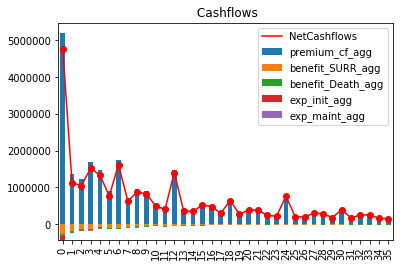

In [9]:
ax = pd.DataFrame(data).plot.line(marker='o', color='r')
df.plot(kind='bar', stacked=True, ax=ax, title=' Cashflows')
plt.show()